In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [155]:
df = pd.read_csv("/Users/Gustavodamasco/Desktop/Datasets/Spending_habits/Responses.csv")

In [156]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [157]:
df.shape

(1010, 150)

In [158]:
df_spending_habits = df.iloc[:,133:140].dropna()

In [159]:
df_spending_habits.head()

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
0,3.0,4.0,5.0,3.0,3.0,1,3.0
1,3.0,4.0,1.0,4.0,2.0,5,2.0
2,2.0,4.0,1.0,4.0,3.0,4,2.0
3,2.0,4.0,3.0,3.0,4.0,4,1.0
4,4.0,3.0,4.0,3.0,3.0,2,4.0


In [160]:
df_spending_habits.columns = [c.lower().replace(" " , "_") for c in df_spending_habits.columns]

In [161]:
df_spending_habits.head()

,finances,shopping_centres,branded_clothing,entertainment_spending,spending_on_looks,spending_on_gadgets,spending_on_healthy_eating
0,3.0,4.0,5.0,3.0,3.0,1,3.0
1,3.0,4.0,1.0,4.0,2.0,5,2.0
2,2.0,4.0,1.0,4.0,3.0,4,2.0
3,2.0,4.0,3.0,3.0,4.0,4,1.0
4,4.0,3.0,4.0,3.0,3.0,2,4.0


In [162]:
df_spending_habits.shape

(995, 7)

In [132]:
df_spending_habits.skew().mean()

-0.1357569496100221

In [163]:
df_personality = df.iloc[:,76:133].dropna()

In [164]:
df_personality.head()

,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,...,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage
0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,...,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day
1,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,...,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day
2,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,...,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day
4,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,...,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day
5,2.0,2.0,3.0,3.0,3.0,1.0,3.0,4.0,3.0,2.0,...,3.0,4.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,few hours a day


In [165]:
df_personality.columns = [c.lower().replace(" " , "_") for c in df_personality.columns]

In [166]:
df_personality.head()

,daily_events,prioritising_workload,writing_notes,workaholism,thinking_ahead,final_judgement,reliability,keeping_promises,loss_of_interest,friends_versus_money,...,happiness_in_life,energy_levels,small_-_big_dogs,personality,finding_lost_valuables,getting_up,interests_or_hobbies,parents'_advice,questionnaires_or_polls,internet_usage
0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,...,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day
1,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,...,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day
2,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,...,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day
4,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,...,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day
5,2.0,2.0,3.0,3.0,3.0,1.0,3.0,4.0,3.0,2.0,...,3.0,4.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,few hours a day


In [167]:
df_personality.shape

(864, 57)

In [168]:
df_personality.skew().mean()

-0.14315164136141315

In [139]:
# KNN model test

In [207]:
X = df_personality.iloc[:,0:30]
y = df_spending_habits.iloc[0:864,0]

In [214]:
knn = KNeighborsClassifier(n_neighbors=27)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores

[ 0.31818182  0.28409091  0.32954545  0.36363636  0.33333333  0.36046512
  0.35294118  0.31764706  0.34117647  0.38095238]


In [215]:
print np.mean(scores)

0.33819700819


In [216]:
# search for an optimal value of K
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))
print scores

[0.27312689134850554, 0.25607183596628852, 0.2688004151139205, 0.27661904996743897, 0.29292893981971302, 0.29545507843729457, 0.29069601625005181, 0.3080483208082388, 0.30235631673388169, 0.30458512857647257, 0.30929257312023012, 0.3149476604814121, 0.32534843389860135, 0.32541622634327477, 0.33337107555714568, 0.32758043597988878, 0.32986746138274514, 0.32889309897612173, 0.32647363450738609, 0.32996168088872935, 0.32779747125211534, 0.32537832177414228, 0.33130079289862768, 0.33115310103045376, 0.3300008438893528, 0.33702085208217569, 0.33819700819016829, 0.33711537534748537, 0.33589879780737841]


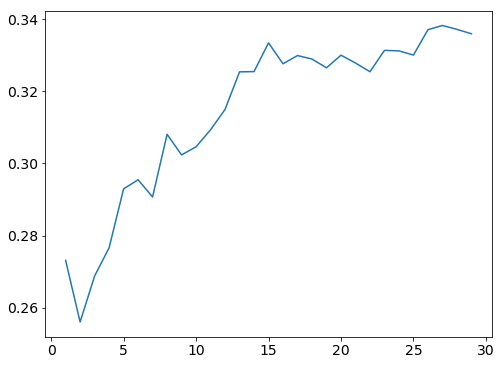

In [217]:
plt.plot(k_range, scores)

In [187]:
# logistic regression model test

In [218]:
X = df_personality.iloc[:,0:30]
y = df_spending_habits.iloc[0:864,0]

In [219]:
logreg = LogisticRegression()
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.33010963210099964